In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pickle
import sys
import time
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import lda
import pyLDAvis
import pyLDAvis.gensim_models
%matplotlib inline

### Creating the corpus

In [3]:
#with open('files/souplist.txt', 'r', encoding='utf-8') as f:
    #souplist = f.read()

In [4]:
#souplist = souplist.split('BREAKHERE')

In [5]:
#articles = []
#for s in souplist:
    #soup = BeautifulSoup(s, 'lxml')
    #for text in soup.find_all('div', attrs={'class': 'avia_textblock'}):
        #paragraphs = []
        #paragraphs.append(text.text)
        #print(text.text)
        #print('___')
        #for paragraph in paragraphs:
            #articles.append(paragraph)

In [6]:
#corpus = ' '.join(articles)
#with open('files/corpus.txt', 'w', encoding='utf-8') as file:
    #file.write(corpus)

In [2]:
with open('files/corpus.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()

In [4]:
corpus[0:10000]

'\n\n\n              Ist die Hausdurchsuchung bei Identitären-Chef Sellner verraten worden? Und: Wer hat sie verraten? Geheimdokumente belasten Kickls Mann fürs Harte: Peter Goldgruber, seinen Generalsekretär im Innenministerium. Peter Pilz, Spitzenkandidat von JETZT stellt eine parlamentarische Anfrage an das Innenministerium, um den Fall aufzuklären.\n              \n\n\n\n             Wien, 04.08.2019 / Schon kurz nach dem Terror-Anschlag im neuseeländischen Christchurch ist klar: Eine entscheidende Spur führt zu Martin Sellner, dem Chef der rechtsextremen Identitären Bewegung Österreichs, der IBÖ. Fünf Tage nach dem Anschlag erteilt Generalsekretär Goldgruber am 20. März 2019 BVT-Direktor Peter Gridling eine Weisung:\n             \n              „Über getroffene Maßnahmen und festgestellte Lage ist (…) bis auf weiteres jeden Freitag bis 12 Uhr zu berichten.“\n             \n\n\n             Einen Tag später um 13.54 Uhr verstärkt Goldgruber den Druck auf den BVT-Direktor: „\n     

### Cleaning the corpus

In [5]:
corpus = re.sub(r'\s{2,}', ' ', corpus)

In [6]:
corpus = corpus.lower()

In [7]:
corpus = re.sub('[%s]' % re.escape(string.punctuation), '', corpus)

In [8]:
corpus = re.sub(r'\w*\d\w*', '', corpus)

In [9]:
corpus = re.sub('[„“‚‘…”–]', '', corpus)

In [10]:
stop_words = set(stopwords.words('german'))

In [11]:
newStopWords = ['wien','titelbild', 'picturedesk', 'apa', 'mehr', 'sei', 'wurde', 'zackzack', 'radieschen', 'schon', 'bereits', 'seit', 'gibt', 'immer', 'zwei', 'geht', 'viele', 'wäre', 'ab', 'beim', 'dafür',
               'dabei', 'etwa', 'sollen']
for i in newStopWords:
    stop_words.add(i)

In [12]:
print(stop_words)

{'derselben', 'jedem', 'also', 'und', 'uns', 'viel', 'kann', 'bereits', 'gibt', 'hin', 'nun', 'zwar', 'sie', 'weiter', 'einer', 'hatte', 'hatten', 'ich', 'hinter', 'sind', 'einigen', 'seit', 'dabei', 'haben', 'etwa', 'werde', 'dazu', 'war', 'an', 'solchem', 'sollen', 'solcher', 'dann', 'jener', 'mehr', 'so', 'will', 'allen', 'dort', 'am', 'anderes', 'er', 'ins', 'alles', 'doch', 'jetzt', 'mir', 'einiger', 'sondern', 'jenen', 'damit', 'ihnen', 'einmal', 'gewesen', 'deinen', 'eurer', 'denn', 'würden', 'nach', 'euer', 'andern', 'du', 'eine', 'unser', 'wollte', 'beim', 'jeden', 'zum', 'daß', 'jede', 'dies', 'manchen', 'kein', 'derer', 'solche', 'warst', 'radieschen', 'wollen', 'können', 'euren', 'ihrer', 'manches', 'dasselbe', 'bin', 'gegen', 'seines', 'diesen', 'jeder', 'im', 'anderm', 'das', 'würde', 'meinem', 'nichts', 'seinem', 'ihr', 'sonst', 'nicht', 'mancher', 'einem', 'werden', 'der', 'dieselbe', 'ist', 'könnte', 'welchen', 'unsere', 'eures', 'meinen', 'ohne', 'soll', 'unserem', 'a

In [13]:
word_tokens = word_tokenize(corpus)

In [14]:
filtered_corpus = [w for w in word_tokens if w not in stop_words]

### Exploratory Data Analysis

In [ ]:
freqdist = Counter(filtered_corpus)
freqdist.most_common(50)

In [ ]:
cleaned = ' '.join(filtered_corpus)
wordcloud = WordCloud().generate(cleaned)

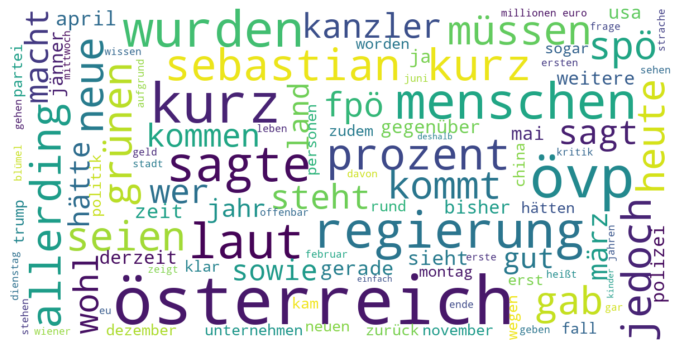

In [42]:
wordcloud = WordCloud(background_color='white',
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1).generate(cleaned)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
 plt.savefig('wc.png')

<Figure size 432x288 with 0 Axes>

### Creating the document term matrix

In [19]:
filtered_corpus =[filtered_corpus]

In [20]:
dictionary = corpora.Dictionary(filtered_corpus)
doc_term_matrix = [dictionary.doc2bow(i) for i in filtered_corpus]

### Running the model

In [21]:
Lda = gensim.models.ldamodel.LdaModel

In [22]:
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=100)

In [24]:
print(ldamodel.print_topics(num_topics=3, num_words=10))

[(0, '0.005*"kurz" + 0.004*"övp" + 0.003*"österreich" + 0.003*"prozent" + 0.003*"menschen" + 0.003*"euro" + 0.002*"regierung" + 0.002*"laut" + 0.002*"wurden" + 0.002*"sagte"'), (1, '0.000*"kurz" + 0.000*"österreich" + 0.000*"prozent" + 0.000*"övp" + 0.000*"euro" + 0.000*"menschen" + 0.000*"wurden" + 0.000*"laut" + 0.000*"spö" + 0.000*"regierung"'), (2, '0.000*"österreich" + 0.000*"kurz" + 0.000*"övp" + 0.000*"prozent" + 0.000*"euro" + 0.000*"regierung" + 0.000*"laut" + 0.000*"menschen" + 0.000*"rund" + 0.000*"wurden"')]


### Visualizing the topics-keywords

In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.216091 -0.0       1        1  99.999949
2     -0.108045 -0.0       2        1   0.000026
1     -0.108045 -0.0       3        1   0.000026, topic_info=           Term        Freq        Total Category  logprob  loglift
130950  ähnlich  214.000000   214.000000  Default  30.0000  30.0000
48443    handel  214.000000   214.000000  Default  29.0000  29.0000
45539   glauben  214.000000   214.000000  Default  28.0000  28.0000
26690   dürften  215.000000   215.000000  Default  27.0000  27.0000
45188   gezeigt  214.000000   214.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
56935    jedoch    0.000003  1611.095752   Topic3 -11.8026  -5.0677
78214     neuen    0.000003  1338.173644   Topic3 -11.8026  -4.8821
56583        ja    0.000003  1273.145339   Topic3 -11.8026  -4.8322
94202      sagt    0.000003  1377.584805   Topic3 -11.8026  -4.9111
47358     grüne    0.000003  1204.176044   Topic3 -11.8026  -4.7765

[180 rows x 6 columns], token_table=        Topic      Freq            Term
term                                   
1946        1  0.888406          aerial
2553        1  1.000266        aktuelle
2903        1  1.000245      allerdings
4250        1  0.888406   angegriffenen
5613        1  0.888406       antrieben
...       ...       ...             ...
128228      1  0.999904            zeit
129870      1  1.000333  zusammenarbeit
130950      1  1.000198         ähnlich
131532      1  0.999927      österreich
131650      1  0.999993             övp

[101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### Evaluating different models

In [26]:
# Perplexity score
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix,total_docs=1))

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=filtered_corpus, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.790265345357692

Coherence Score:  0.2933183860392257


In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=filtered_corpus, start=2, limit=50, step=1)

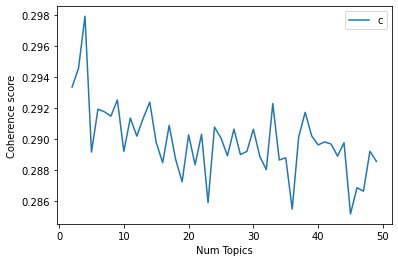

In [29]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [30]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2933
Num Topics = 3  has Coherence Value of 0.2946
Num Topics = 4  has Coherence Value of 0.2979
Num Topics = 5  has Coherence Value of 0.2892
Num Topics = 6  has Coherence Value of 0.2919
Num Topics = 7  has Coherence Value of 0.2918
Num Topics = 8  has Coherence Value of 0.2915
Num Topics = 9  has Coherence Value of 0.2925
Num Topics = 10  has Coherence Value of 0.2892
Num Topics = 11  has Coherence Value of 0.2914
Num Topics = 12  has Coherence Value of 0.2902
Num Topics = 13  has Coherence Value of 0.2914
Num Topics = 14  has Coherence Value of 0.2924
Num Topics = 15  has Coherence Value of 0.2898
Num Topics = 16  has Coherence Value of 0.2885
Num Topics = 17  has Coherence Value of 0.2909
Num Topics = 18  has Coherence Value of 0.2887
Num Topics = 19  has Coherence Value of 0.2872
Num Topics = 20  has Coherence Value of 0.2903
Num Topics = 21  has Coherence Value of 0.2883
Num Topics = 22  has Coherence Value of 0.2903
Num Topics = 23  has 

In [35]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.004*"kurz" + 0.004*"övp" + 0.003*"prozent" + 0.003*"österreich" + 0.003*"menschen" + 0.003*"laut" + 0.002*"euro" + 0.002*"wurden" + 0.002*"regierung" + 0.002*"spö"'),
 (1,
  '0.005*"övp" + 0.004*"kurz" + 0.002*"prozent" + 0.002*"euro" + 0.002*"menschen" + 0.002*"österreich" + 0.002*"wurden" + 0.002*"sagte" + 0.002*"regierung" + 0.002*"rund"'),
 (2,
  '0.006*"kurz" + 0.003*"österreich" + 0.003*"övp" + 0.003*"regierung" + 0.003*"menschen" + 0.003*"prozent" + 0.002*"euro" + 0.002*"sagte" + 0.002*"laut" + 0.002*"millionen"'),
 (3,
  '0.005*"kurz" + 0.004*"övp" + 0.003*"prozent" + 0.003*"österreich" + 0.003*"euro" + 0.002*"menschen" + 0.002*"wurden" + 0.002*"millionen" + 0.002*"laut" + 0.002*"regierung"'),
 (4,
  '0.005*"kurz" + 0.003*"övp" + 0.003*"österreich" + 0.002*"euro" + 0.002*"menschen" + 0.002*"laut" + 0.002*"prozent" + 0.002*"wurden" + 0.002*"regierung" + 0.002*"worden"'),
 (5,
  '0.004*"kurz" + 0.004*"österreich" + 0.003*"övp" + 0.003*"prozent" + 0.002*"menschen" + 0.00

In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.003217  0.001152       1        1  47.129716
3      0.001484  0.000022       2        1  13.369751
6      0.001318  0.000123       3        1  13.300950
8      0.001083 -0.002921       4        1  10.375441
4      0.001239 -0.000597       5        1   9.337930
0      0.000647 -0.000301       6        1   5.604065
5     -0.000425  0.002846       7        1   0.876463
7     -0.004063 -0.000127       8        1   0.004453
1     -0.004499 -0.000198       9        1   0.001230, topic_info=              Term         Freq        Total Category  logprob  loglift
131650         övp  4595.000000  4595.000000  Default  30.0000  30.0000
64420         kurz  6807.000000  6807.000000  Default  29.0000  29.0000
131532  österreich  4424.000000  4424.000000  Default  28.0000  28.0000
72456     menschen  3470.000000  3470.000000  Default  27.0000  27.0000
87908      prozent  3571.000000  3571.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
73448    millionen     0.021300  2369.653701   Topic9  -6.6631  -0.3139
125327      wiener     0.018415  1686.407499   Topic9  -6.8086  -0.1193
37985          fpö     0.018383  1803.540961   Topic9  -6.8103  -0.1882
56667       jahren     0.017704  1580.939280   Topic9  -6.8480  -0.0941
16742       blümel     0.017627  1716.743109   Topic9  -6.8523  -0.1808

[904 rows x 6 columns], token_table=        Topic      Freq Term
term                        
0           1  0.426986    a
0           2  0.129717    a
0           3  0.142329    a
0           4  0.131519    a
0           5  0.106296    a
...       ...       ...  ...
133443      3  0.150480    ’
133443      4  0.118234    ’
133443      5  0.072553    ’
133443      6  0.047473    ’
133443      7  0.009853    ’

[3376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 9, 5, 1, 6, 8, 2])

In [36]:
pyLDAvis.save_html(vis, 'topicmodel_vis.html')

### References

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

https://github.com/rsreetech/LDATopicModelling/blob/main/LDADemo.ipynb

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore